# Загрузка данных и первичный осмотр

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузка датасета

In [2]:
df = pd.read_csv(r"C:\Users\Лера\Downloads\S02-hw-dataset.csv")

Вывод первых строк датасета

In [3]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Вывод информации о столбцах и типах

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Вывод базовых описательных статистик

In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# Пропуски, дубликаты и базовый контроль качества

Расчет доли пропусков в каждом столбце

In [6]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Проверка на наличие полностью дублирующих строк

In [7]:
df.duplicated().sum()

np.int64(1)

Поиск подозрительных случаев

In [8]:
print(f"Значение количества совершенных покупок меньше нуля встречается {len(df[df['purchases'] < 0])} раз(а):")
print(df[df['purchases'] < 0], "\n")

print(f"Значение прибыли меньше нуля встречается {len(df[df['revenue'] < 0])} раз(а)")
print(df[df['revenue'] < 0], "\n")

print(f"Значение возраста <1 или >100 встречается {len(df[(df['age'] < 1) | (df['age'] > 100)])} раз(а)")
print(df[(df['age'] < 1) | (df['age'] > 100)], "\n")

print(f"Нулевая прибыль при ненулевых покупках встречается {len(df[(df['revenue'] == 0) & (df['purchases'] > 0)])} раз(а)")
print(df[(df['revenue'] == 0) & (df['purchases'] > 0)], "\n")

print(f"Ненулевая прибыль при нулевых покупках встречается {len(df[(df['revenue'] > 0) & (df['purchases'] == 0)])} раз(а)")
print(df[(df['revenue'] > 0) & (df['purchases'] == 0)])

Значение количества совершенных покупок меньше нуля встречается 1 раз(а):
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785 

Значение прибыли меньше нуля встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 

Значение возраста <1 или >100 встречается 1 раз(а)
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785 

Нулевая прибыль при ненулевых покупках встречается 1 раз(а)
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0 

Ненулевая прибыль при нулевых покупках встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


При проверке качества данных было обнаружено два пропуска в столбце age и одна дублирующая строка.

Также были выявлены нереалистичные значения: 
+ 1 раз встретилось отрицательное значение количества покупок.
+ 2 раза встретились не очень реалистичные значения возраста (меньше 1 и больше 100).
+ 1 раз встретилась нулевая прибыль при ненулевом количестве совершенных покупок.

Почистим

In [9]:
df = df.dropna()
df = df.drop_duplicates()

df = df.drop(10)
df = df.drop(5)

Посмотрим что теперь

In [10]:
df.describe()

,user_id,age,purchases,revenue
count,36.000000,36.000000,36.000000,36.000000
mean,21.805556,34.888889,4.805556,844.444444
std,11.553155,12.367649,2.594714,632.087446
min,1.000000,5.000000,0.000000,0.000000
25%,13.500000,24.750000,3.000000,425.000000
50%,22.500000,33.500000,5.000000,697.500000
75%,31.250000,45.250000,7.000000,1126.750000
max,40.000000,57.000000,11.000000,2475.000000


In [11]:
df.isna().sum()

user_id      0
age          0
country      0
purchases    0
revenue      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
print(f"Значение количества совершенных покупок меньше нуля встречается {len(df[df['purchases'] < 0])} раз(а):")
print(df[df['purchases'] < 0], "\n")

print(f"Значение прибыли меньше нуля встречается {len(df[df['revenue'] < 0])} раз(а)")
print(df[df['revenue'] < 0], "\n")

print(f"Значение возраста <1 или >100 встречается {len(df[(df['age'] < 1) | (df['age'] > 100)])} раз(а)")
print(df[(df['age'] < 1) | (df['age'] > 100)], "\n")

print(f"Нулевая прибыль при ненулевых покупках встречается {len(df[(df['revenue'] == 0) & (df['purchases'] > 0)])} раз(а)")
print(df[(df['revenue'] == 0) & (df['purchases'] > 0)], "\n")

print(f"Ненулевая прибыль при нулевых покупках встречается {len(df[(df['revenue'] > 0) & (df['purchases'] == 0)])} раз(а)")
print(df[(df['revenue'] > 0) & (df['purchases'] == 0)])

Значение количества совершенных покупок меньше нуля встречается 0 раз(а):
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 

Значение прибыли меньше нуля встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 

Значение возраста <1 или >100 встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 

Нулевая прибыль при ненулевых покупках встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 

Ненулевая прибыль при нулевых покупках встречается 0 раз(а)
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


Теперь никаких пустых и странных значений

## Базовый EDA: группировки, агрегаты и частоты

Подсчет частоты для одной категориальной переменной

In [14]:
print(df['country'].value_counts())

country
RU    12
FR    11
US     6
DE     5
CN     2
Name: count, dtype: int64


Выполнить группировку с агрегатами через groupby

In [15]:
# Группировка по странам
fellows = df.groupby('country').agg({'age':'mean', 'purchases': ['mean', 'sum'], 'revenue': ['mean', 'sum', 'count']}).round(2)
print(fellows)

           age purchases      revenue            
          mean      mean sum     mean   sum count
country                                          
CN       24.00      4.50   9  1054.00  2108     2
DE       34.60      6.60  33  1475.40  7377     5
FR       39.55      4.73  52   666.00  7326    11
RU       30.58      4.58  55   813.33  9760    12
US       38.83      4.00  24   638.17  3829     6


In [16]:
# Группировка по возрастам
bins = [0, 18, 25, 35, 45, 55, 100]  
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']  

df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

peers = df.groupby('age_range').agg({'user_id': 'count', 'age': 'mean', 'purchases': ['mean', 'sum'], 'revenue': ['mean', 'sum']}).round(2)

print(peers)

          user_id    age purchases      revenue       
            count   mean      mean sum     mean    sum
age_range                                             
0-18            1   5.00      8.00   8  1488.00   1488
19-25           8  22.00      4.50  36   707.50   5660
26-35          10  30.00      5.30  53  1009.60  10096
36-45           7  38.43      5.00  35  1042.86   7300
46-55           8  49.25      4.12  33   627.62   5021
56+             2  56.00      4.00   8   417.50    835


C:\Users\Лера\AppData\Local\Temp\ipykernel_14540\4220571933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peers = df.groupby('age_range').agg({'user_id': 'count', 'age': 'mean', 'purchases': ['mean', 'sum'], 'revenue': ['mean', 'sum']}).round(2)


В датасете преобладают пользователи из России(13) и из Франции(12), суммарно они составляют 64% аудитории. По возрасту наиболее часто встречающейся является категория пользователей от 26 до 35 лет.

Немецкие пользователи показывают самый высокий уровень активности: всего 5 пользователей из 36 приносят 22% от общей выручки. Франция, хотя является второй после России по количеству пользователей, показывает почти самую низкую среднюю выручку. Группы 26-35 и 26-45 лет приносят самую большую выручку, 53 % от общей суммы. После 45 лет заметно сильное снижение средней выручки, хотя количество пользователей упало не сильно.

Один пятилетний пользователь принес 1488 единиц выручки с 8 покупок, что является самым большим показателем на одного человека.

# Визуализация данных в Matplotlib

Гистограмма по возрастам

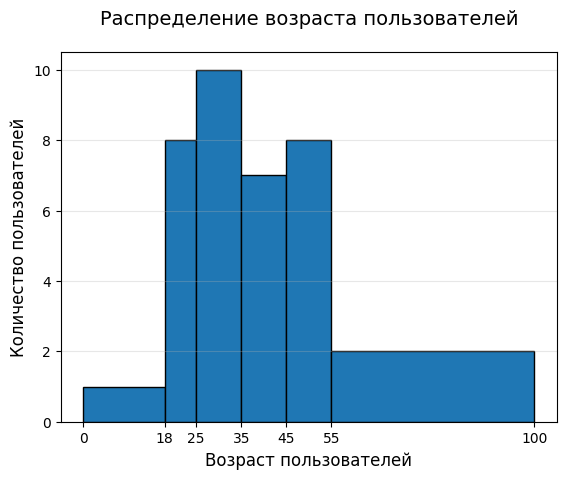

In [17]:
plt.hist(df['age'].dropna(), bins=bins, 
         edgecolor='black')
plt.xlabel('Возраст пользователей', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.xticks(bins)
plt.show()

На гистограмме показано распределение по возрастам среди всех пользователей. Видно, что больше всего людей в диапазоне от 26 до 35 лет.

Боксплот по прибыли в зависимости от страны

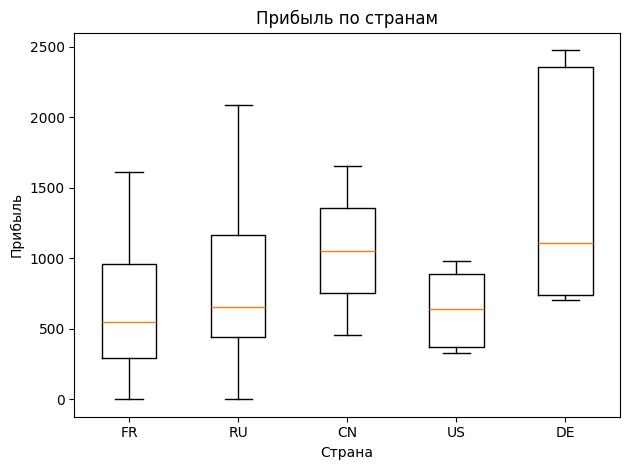

In [20]:
countries = df['country'].unique()
data = [df[df['country'] == c]['revenue'] for c in countries]
plt.boxplot(data, tick_labels=countries)
plt.xlabel('Страна')
plt.ylabel('Прибыль')
plt.title('Прибыль по странам')
plt.tight_layout()
plt.savefig(r"C:\git_proj\aie\homeworks\HW02\figures\boxplot.png")
plt.show()

Данная диаграмма демонстрирует распределение прибыли по странам. Видно, что самую высокую среднюю прибыль имеет Германия

Диаграмма рассеяния возраста и прибыли

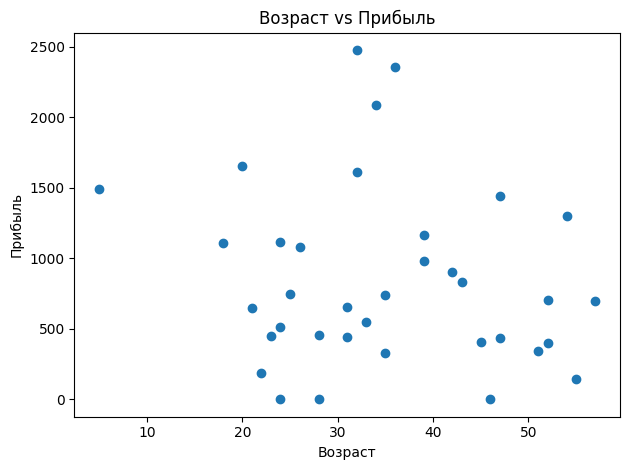

In [19]:
plt.scatter(df['age'], df['revenue'])

plt.xlabel('Возраст')
plt.ylabel('Прибыль')
plt.title('Возраст vs Прибыль')

plt.tight_layout()
plt.show()

Диаграмма рассеяния показывает связь между возрастом и прибылью. Никакой четкой связи уследить не удается.